In [35]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()
# video_path = 'video-samples/8623-212638552_medium.mp4'
video_path = 'video-samples/faker_highlight.mp4'

In [36]:
import easyocr
reader = easyocr.Reader(['ch_sim','en']) # this needs to run only once to load the model into memory

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


/home/lap13833/anaconda3/envs/video-chatbot/lib/python3.11/site-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyState

In [37]:
from scenedetect import detect, ContentDetector
scene_list = detect(video_path, ContentDetector(threshold=2.0))

In [38]:
for i, scene in enumerate(scene_list):
    print('Scene %2d: Start %s / Frame %d, End %s / Frame %d' % (
        i+1,
        scene[0].get_timecode(), scene[0].get_frames(),
        scene[1].get_timecode(), scene[1].get_frames(),))

Scene  1: Start 00:00:00.000 / Frame 0, End 00:00:09.243 / Frame 277
Scene  2: Start 00:00:09.243 / Frame 277, End 00:00:26.026 / Frame 780
Scene  3: Start 00:00:26.026 / Frame 780, End 00:00:26.760 / Frame 802
Scene  4: Start 00:00:26.760 / Frame 802, End 00:00:31.565 / Frame 946
Scene  5: Start 00:00:31.565 / Frame 946, End 00:00:32.199 / Frame 965
Scene  6: Start 00:00:32.199 / Frame 965, End 00:00:33.634 / Frame 1008
Scene  7: Start 00:00:33.634 / Frame 1008, End 00:00:34.801 / Frame 1043
Scene  8: Start 00:00:34.801 / Frame 1043, End 00:00:36.003 / Frame 1079
Scene  9: Start 00:00:36.003 / Frame 1079, End 00:00:37.004 / Frame 1109
Scene 10: Start 00:00:37.004 / Frame 1109, End 00:00:37.838 / Frame 1134
Scene 11: Start 00:00:37.838 / Frame 1134, End 00:00:38.639 / Frame 1158
Scene 12: Start 00:00:38.639 / Frame 1158, End 00:00:39.273 / Frame 1177
Scene 13: Start 00:00:39.273 / Frame 1177, End 00:00:42.409 / Frame 1271
Scene 14: Start 00:00:42.409 / Frame 1271, End 00:00:44.811 / Fr

In [39]:
from scenedetect import detect, ContentDetector, split_video_ffmpeg
scene_list = detect(video_path, ContentDetector())
split_video_ffmpeg(video_path, scene_list)

0

In [40]:
from scenedetect import open_video, SceneManager, split_video_ffmpeg
from scenedetect.detectors import ContentDetector
from scenedetect.video_splitter import split_video_ffmpeg

def split_video_into_scenes(video_path, threshold=2.0):
    # Open our video, create a scene manager, and add a detector.
    video = open_video(video_path)
    scene_manager = SceneManager()
    scene_manager.add_detector(
        ContentDetector(threshold=threshold))
    scene_manager.detect_scenes(video, show_progress=True)
    scene_list = scene_manager.get_scene_list()
    split_video_ffmpeg(video_path, scene_list, show_progress=True)
    return scene_list

In [41]:
frames_info = split_video_into_scenes(video_path)

  Detected: 0 | Progress:   0%|          | 0/1710 [00:00<?, ?frames/s]

  Detected: 18 | Progress: 100%|██████████| 1710/1710 [00:09<00:00, 179.71frames/s]
100%|██████████| 1710/1710 [00:08<00:00, 211.27frame/s]


In [42]:
import cv2

cap = cv2.VideoCapture(video_path)

In [43]:
scene_folder = 'scenes'
os.makedirs(scene_folder, exist_ok=True)

for idx, (start_frame, end_frame) in enumerate(frames_info):
    # Calculate the middle frame
    middle_frame = start_frame.get_frames() + (end_frame.get_frames() - start_frame.get_frames()) // 2

    # Set the video to the middle frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)

    # Read the frame
    ret, frame = cap.read()
    if ret:
        # Save the frame as an image
        frame_filename = f"segment_{idx}_middle_frame_{middle_frame}.png"
        cv2.imwrite(os.path.join(scene_folder, frame_filename), frame)
        print(f"Saved {frame_filename}")
    else:
        print(f"Failed to read frame {middle_frame}")

# Release the video capture object
cap.release()

Saved segment_0_middle_frame_138.png
Saved segment_1_middle_frame_528.png
Saved segment_2_middle_frame_791.png
Saved segment_3_middle_frame_874.png
Saved segment_4_middle_frame_955.png
Saved segment_5_middle_frame_986.png
Saved segment_6_middle_frame_1025.png
Saved segment_7_middle_frame_1061.png
Saved segment_8_middle_frame_1094.png
Saved segment_9_middle_frame_1121.png
Saved segment_10_middle_frame_1146.png
Saved segment_11_middle_frame_1167.png
Saved segment_12_middle_frame_1224.png
Saved segment_13_middle_frame_1307.png
Saved segment_14_middle_frame_1355.png
Saved segment_15_middle_frame_1377.png
Saved segment_16_middle_frame_1487.png
Saved segment_17_middle_frame_1607.png
Saved segment_18_middle_frame_1668.png


In [44]:
from langchain_community.document_loaders import ImageCaptionLoader

list_image_urls = [os.path.join(scene_folder, i) for i in os.listdir(scene_folder)]

In [45]:
loader = ImageCaptionLoader(images=list_image_urls)
list_docs = loader.load()

/home/lap13833/anaconda3/envs/video-chatbot/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/home/lap13833/anaconda3/envs/video-chatbot/lib/python3.11/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [46]:
for (doc, (start_frame, end_frame)) in zip(list_docs, frames_info):
    doc.metadata['start_frame'] = str(start_frame)
    doc.metadata['end_frame'] = str(end_frame)
    doc.metadata['text_info'] = ','.join([i[1] for i in (reader.readtext(doc.metadata['image_path']))])
list_docs 

[Document(metadata={'image_path': 'scenes/segment_7_middle_frame_1061.png', 'start_frame': '00:00:00.000', 'end_frame': '00:00:09.243', 'text_info': 'GANING,FIHN'}, page_content='an image of a game screen with a bunch of flowers [SEP]'),
 Document(metadata={'image_path': 'scenes/segment_3_middle_frame_874.png', 'start_frame': '00:00:09.243', 'end_frame': '00:00:26.026', 'text_info': 'GANING,FANE'}, page_content='an image of a video game with a video player [SEP]'),
 Document(metadata={'image_path': 'scenes/segment_0_middle_frame_163.png', 'start_frame': '00:00:26.026', 'end_frame': '00:00:26.760', 'text_info': ''}, page_content='an image of a field with trees and clouds [SEP]'),
 Document(metadata={'image_path': 'scenes/segment_1_middle_frame_361.png', 'start_frame': '00:00:26.760', 'end_frame': '00:00:31.565', 'text_info': ''}, page_content='an image of a flock of birds flying in the sky [SEP]'),
 Document(metadata={'image_path': 'scenes/segment_12_middle_frame_1224.png', 'start_frame

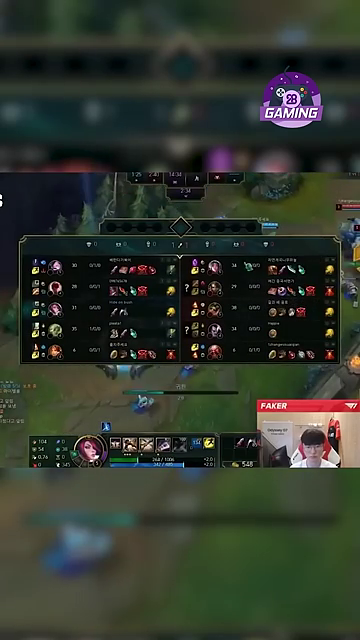

In [50]:
import requests
from PIL import Image

Image.open(list_image_urls[0]).convert("RGB")

In [51]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(list_docs)
vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings())

In [55]:
def retrieve_document(text, k = 5):
    return vectorstore.similarity_search(text)[0:k]

def format_context(doc_list):
    chunks = [f"From {doc.metadata.get('start_frame', 'N/A')} to {doc.metadata.get('end_frame', 'N/A')}: {doc.page_content} \n Some text appear in the video scene: {doc.metadata.get('text_info', 'N/A')}" for doc in doc_list]
    return "\n".join(chunks)

In [57]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini", temperature=0)

system_prompt = (
    """You are an assistant for question-answering tasks. 
    Use the following pieces of retrieved context to answer 
    the question. If you don't know the answer, say that you 
    don't know. Use three sentences maximum and keep the 
    answer concise.
    You could thinking about the series of activities in the video.
    Below is the context retrieved from the video frames:\n
    \n\n
    {context}"""
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

def chat(question, k = 5):
    final_prompt = prompt.format(input=question, context=format_context(retrieve_document(question, k=k)))
    # print(final_prompt)
    response = model.invoke(final_prompt)
    return response.content

# question = "What animals are in the images in what period of time?"

# final_prompt = prompt.format(input=question, context=format_context(retrieve_document(question, k=2)))

# response = model.invoke(final_prompt)

# print(response.content)

# Change the content: question inside the function to chat 

In [58]:
chat("when the video show a player playing game?")

'The video shows a player playing a game from 00:00:09.243 to 00:00:26.026 and again from 00:00:54.288 to 00:00:57.057.'

In [59]:
def chat_with_image(question, image_path, k = 5):
    loader = ImageCaptionLoader(images=[image_path])
    image_info = loader.load()[0]
    prompt = f"""
    Image information:
    {image_info.page_content}
    Text in the image: {','.join([i[1] for i in (reader.readtext(image_path))])}

    Answer the question below:
    Question: {question}
    """
    return chat(prompt, k=k)

# Change the content: question, image_path inside the function to chat with image

In [60]:
chat_with_image("In which time i can find this information?", list_image_urls[1])

/home/lap13833/anaconda3/envs/video-chatbot/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/home/lap13833/anaconda3/envs/video-chatbot/lib/python3.11/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'You can find this information from 00:00:09.243 to 00:00:26.026 in the video.'